In [99]:
#import relevant packages 

import pandas as pd 


# Import the three cleaned files

In [100]:
# import Cleaned Reaction file

cln_reaction = pd.read_csv("Cleaned Reaction.csv", index_col=0)

# check the head of the file
cln_reaction.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [101]:
# import Cleaned Content file 
cln_content = pd.read_csv("Cleaned Content.csv", index_col=0)

#check the head 
cln_content.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [102]:
#import Cleaned Reaction type file 
cln_reaction_type = pd.read_csv("Cleaned ReactionType.csv", index_col=0)

# check the head
cln_reaction_type.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


#  Data Modelling

* we start by merging the cln_reaction and cln_content tables together on Content ID column we call the emerging Table "tb1"

* Next, is to mearge tb1 with cln_reaction_type tables on Reaction Type column and call the emerging Table "final_table"

In [103]:
# merge cln_reaction and cln_content table together
tb1 = cln_reaction.merge(cln_content, on="Content ID")

# check the head
tb1.head()

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [104]:
# merge tb1 together with cln_reaction_type

final_table = tb1.merge(cln_reaction_type, on="Reaction Type")

#check the head
final_table.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [105]:
# Let's see if we have any mising value while merging
final_table.isna().sum().sort_values()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

# Data Analysis

* Let's select our Top 5 Categories

In [106]:
# Let's select categories by their scores 

selection= final_table.groupby("Category").sum().sort_values(by="Score", ascending=False)

# check head of selection
selection.head()

C:\Users\Valued Customer\AppData\Local\Temp\ipykernel_18180\4178231821.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  selection= final_table.groupby("Category").sum().sort_values(by="Score", ascending=False)


,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [107]:
# select top_5_categories
top_5_categories = selection.head(5)

# reset the index of top_5_categories
top_5_categories.reset_index(inplace=True)
top_5_categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [108]:
# save the top 5 categories as csv file 
top_5_categories.to_csv("Top_5_Categories.csv")

# Data Visualization

* Let's Visualize the top 5 categories on a bar plot and pie chart

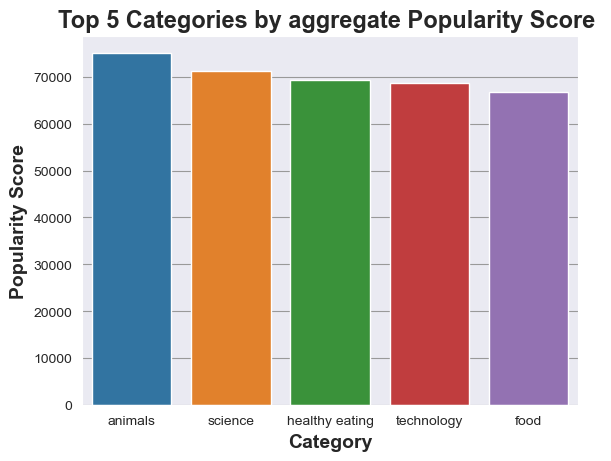

In [109]:
# Top 5 categories on Bar plot
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid",{"grid.color": ".6"})
barplot = sns.barplot(data = top_5_categories, x="Category", y="Score", )
barplot.set_title("Top 5 Categories by aggregate Popularity Score ", fontdict={'size':17, 'weight':"bold"})
barplot.set_xlabel("Category",fontdict={'size':14,'weight':"bold"})
barplot.set_ylabel("Popularity Score",fontdict={'size':14,'weight':"bold"})

plt.show()


In [110]:
barp = barplot.get_figure()
barp.savefig("Bar plot of Top 5 categories.png")

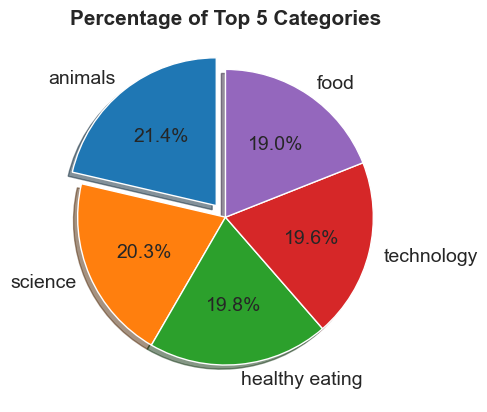

In [111]:
# Top 5 categories on pie chart

# Define sizes and labels
sizes = top_5_categories["Score"]
labels= top_5_categories["Category"]

explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'animals')
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90,textprops={'fontsize': 14})
ax.set_title("Percentage of Top 5 Categories",fontdict={'size':15, 'weight':"bold"})
plt.show()

In [114]:
# Save the pie chart fig
fig.savefig("Percentage of Popularity pie chart.png")

# Insights

Let's Answer the Following Questions ;

* How many unique categories are there?
* How many reactions are there to the most popular category?
* What was the month with the most posts?

In [113]:
# Let's print out the number of Unique Categories

print("Number of Unique Categories in the data set is :",final_table["Category"].nunique())

Number of Unique Categories in the data set is : 16


In [123]:
# Let's print the number of reactions to the most popular category
no_of_reactions= final_table.groupby("Category")["Reaction Type"].count()
no_of_reactions.head(1)

Category
animals    1897
Name: Reaction Type, dtype: int64

In [124]:
print("Number of Reactions to the most popular category(amimals) is :",1897)

Number of Reactions to the most popular category(amimals) is : 1897


In [150]:
# Let's see the month with the most posts

dt_score= final_table.groupby("Datetime").sum().sort_values(by="Score", ascending=False)
dt_score.reset_index(inplace=True)
dt_score.value_counts()

C:\Users\Valued Customer\AppData\Local\Temp\ipykernel_18180\3031745440.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt_score= final_table.groupby("Datetime").sum().sort_values(by="Score", ascending=False)


Datetime             Score
2020-06-18 08:07:22  5        1
2021-02-15 11:53:24  65       1
2021-02-15 14:21:50  15       1
2021-02-15 14:21:32  5        1
2021-02-15 14:09:53  10       1
                             ..
2020-10-18 06:06:04  50       1
2020-10-18 06:03:07  72       1
2020-10-18 05:43:21  60       1
2020-10-18 05:40:17  20       1
2021-06-18 08:30:29  10       1
Length: 24562, dtype: int64

In [152]:
# check the head
dt_score.head()

,Datetime,Score
0,2021-01-16 20:13:52,92
1,2020-08-10 18:01:52,90
2,2020-09-10 06:59:59,87
3,2020-12-13 17:37:25,85
4,2020-09-11 05:52:04,77


If we look at the table Up can conclude that January has the most post, but this shouldn't be true because the table above is only showing number of post for a particular time in January same as other rows, thus we need to dig futher in selecting the months with most popular post, by adding up all the posts for each months and all the times in that month ,
this is done by the code below

In [153]:
dt_score["Datetime"]=pd.to_datetime(dt_score["Datetime"])

dt = dt_score.resample(rule='M', on='Datetime')['Score'].sum()
dt.sort_values(ascending = False,inplace=True)
dt

Datetime
2021-05-31    86293
2021-01-31    82938
2020-10-31    82810
2020-07-31    82464
2020-11-30    82333
2020-08-31    82176
2020-12-31    81163
2020-09-30    80077
2021-03-31    78915
2021-04-30    78598
2021-02-28    75509
2021-06-30    44963
2020-06-30    35406
Name: Score, dtype: int64

As we can see above May 2021 has the most post 